In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
sns.set()
%matplotlib inline

In [2]:
bftrain = pd.read_csv("train.csv")
bftest = pd.read_csv('test.csv')

In [3]:
bftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [4]:
bftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
#merge both test and train data together
df = pd.merge(bftrain,bftest,how='outer')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


## Feature Engineering

In [7]:
#drop unimportant columns
df.drop('User_ID', axis=1, inplace=True)
df.drop('City_Category', axis=1, inplace=True)

In [8]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
# encode the age and gender columns
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df['Age'] = df['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [10]:
null_values = df.isnull().sum()
percentages = (null_values/df.shape[0])*100
missing = pd.DataFrame({'Null_Vals':null_values, 'Percentage_Missing':percentages})

missing

,Null_Vals,Percentage_Missing
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,245982,31.388587
Product_Category_3,545809,69.648078
Purchase,233599,29.808452


In [11]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [12]:
df.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [13]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(16.0)
df['Product_Category_2'] = df['Product_Category_2'].fillna(8.0)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0


In [14]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.map({'2':2, '4+':4, '3':3, '1':1, '0':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 10 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null int64
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 65.8+ MB


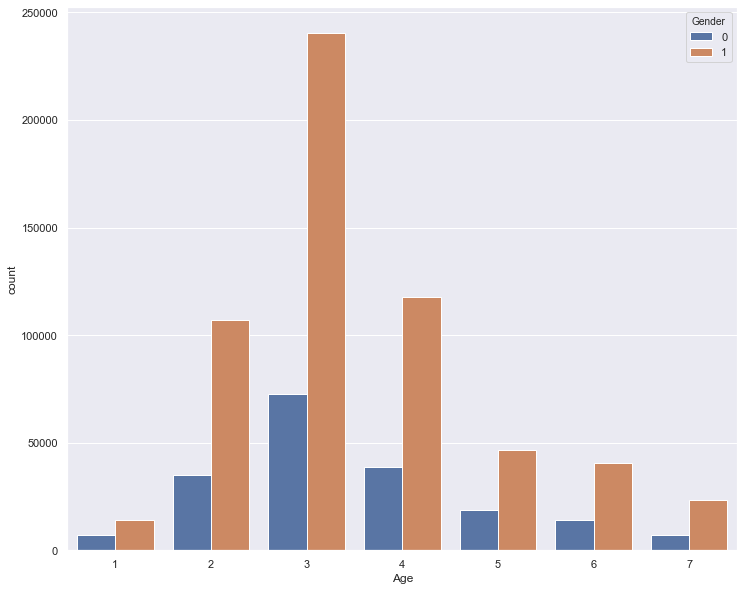

In [23]:
plt.figure(figsize=(12,10))
sns.countplot('Age', hue='Gender', data=df)

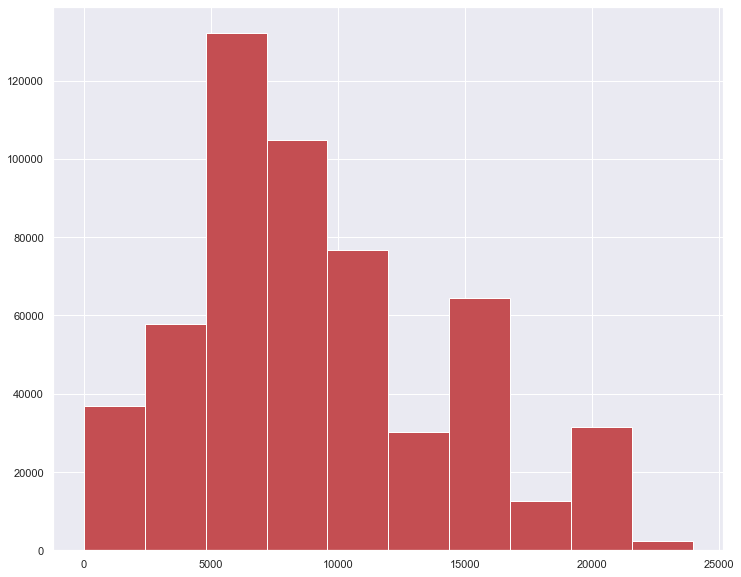

In [24]:
plt.figure(figsize=(12,10))
plt.hist(df['Purchase'],bins=10,color='r')
plt.show()

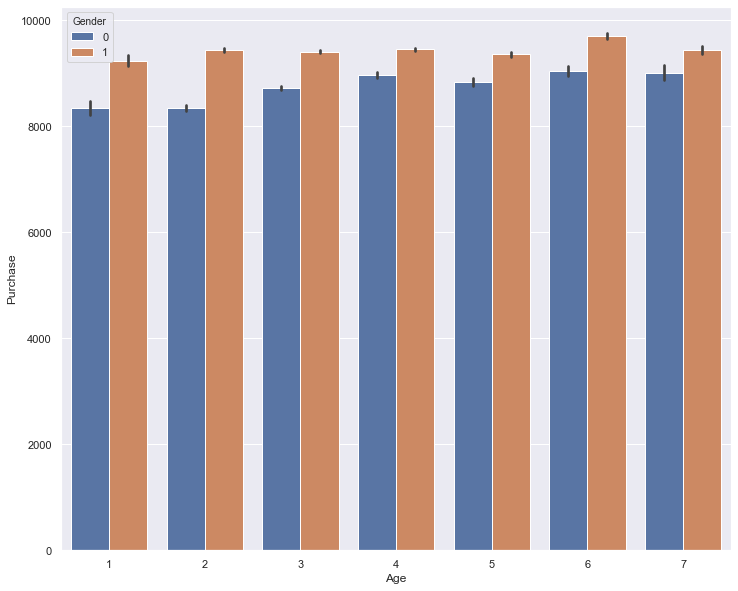

In [25]:
plt.figure(figsize=(12,10))
sns.barplot( x='Age',y='Purchase',hue='Gender',data=df,)

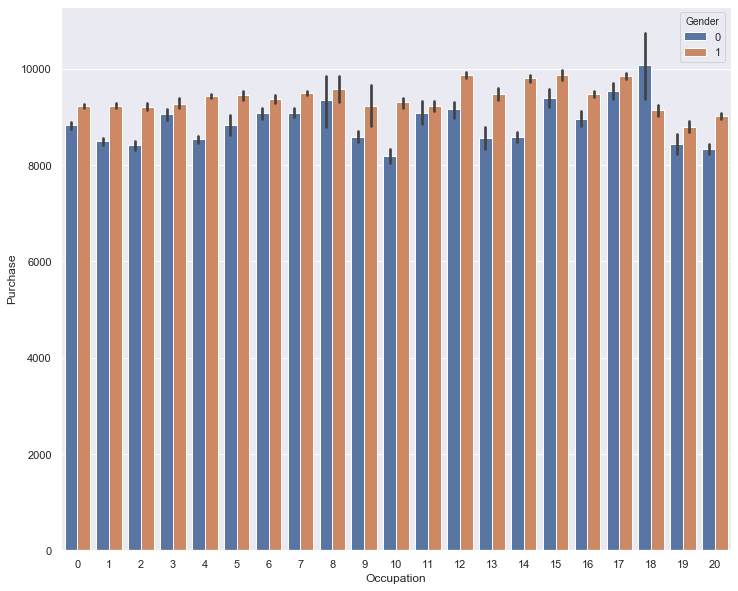

In [26]:
plt.figure(figsize=(12,10))
sns.barplot( x='Occupation',y='Purchase',hue='Gender',data=df)

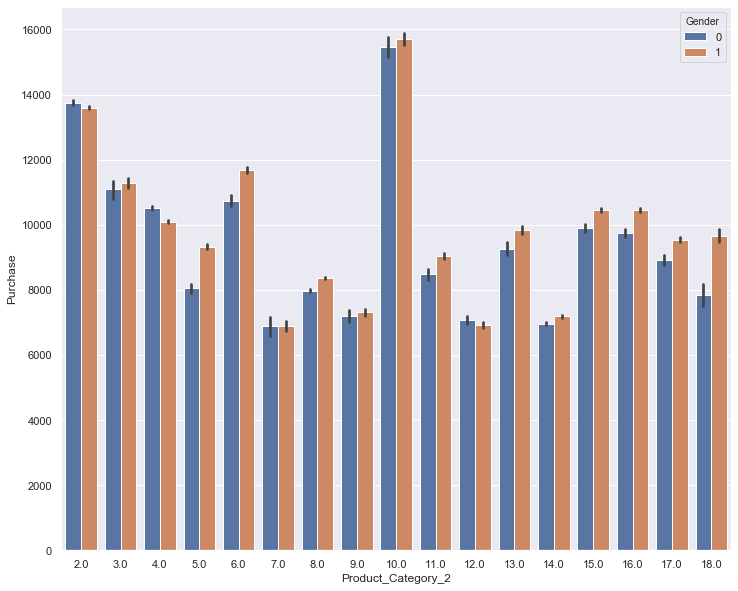

In [27]:
plt.figure(figsize=(12,10))
sns.barplot( x='Product_Category_2',y='Purchase',hue='Gender',data=df)

In [ ]:
#clean null data